In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn import metrics 
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy import stats
from tqdm import tqdm



In [454]:
index_df = pd.read_csv('datasets/sp-500-stocks/sp500_index.csv', parse_dates=['Date'])
print(index_df.shape)
index_df

(2517, 2)


,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
...,...,...
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08


In [455]:
companies_df = pd.read_csv('datasets/sp-500-stocks/sp500_companies.csv')
print(companies_df.shape)
companies_df.head()

(502, 16)


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [456]:
stocks_df = pd.read_csv('datasets/sp-500-stocks/sp500_stocks.csv')
print(stocks_df.shape)
stocks_df.head()

(1891536, 8)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [457]:
stocks_df = pd.read_csv('datasets/sp-500-stocks/sp500_stocks.csv')
stocks_df = stocks_df[stocks_df['Close'].isnull() == False]
print(stocks_df.shape)
stocks_df.head()

(617831, 8)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
3768,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0
3769,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0
3770,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0
3771,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0
3772,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0


In [458]:
stocks = stocks_df.merge(companies_df, on='Symbol', how='left')
print(stocks.shape)
stocks.head()

(617831, 23)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
1,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
2,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
3,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
4,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179


In [459]:
stocks.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [460]:
text_features = ['Symbol','Sector']

num_features = ['Volume', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Weight']

stocks = stocks[text_features + num_features]
print(stocks.shape)


(617831, 8)


In [461]:
result = pd.concat([stocks.isnull().sum(),round(stocks.isnull().mean()*100,2)],axis=1)
result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
result.sort_values(by='total missing',ascending=False,inplace=True)
result

,total missing,proportion
Ebitda,44065,7.13
Revenuegrowth,3768,0.61
Symbol,0,0.00
Sector,0,0.00
Volume,0,0.00
Currentprice,0,0.00
Marketcap,0,0.00
Weight,0,0.00


In [462]:
duplicate_rows = stocks[stocks.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
stocks.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {stocks.shape}")


Number of duplicate rows: 45178
Shape after removing duplicates: (572653, 8)


In [463]:
result = pd.concat([stocks.isnull().sum(),round(stocks.isnull().mean()*100,2)],axis=1)
result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
result.sort_values(by='total missing',ascending=False,inplace=True)
result

,total missing,proportion
Ebitda,41966,7.33
Revenuegrowth,3656,0.64
Symbol,0,0.00
Sector,0,0.00
Volume,0,0.00
Currentprice,0,0.00
Marketcap,0,0.00
Weight,0,0.00


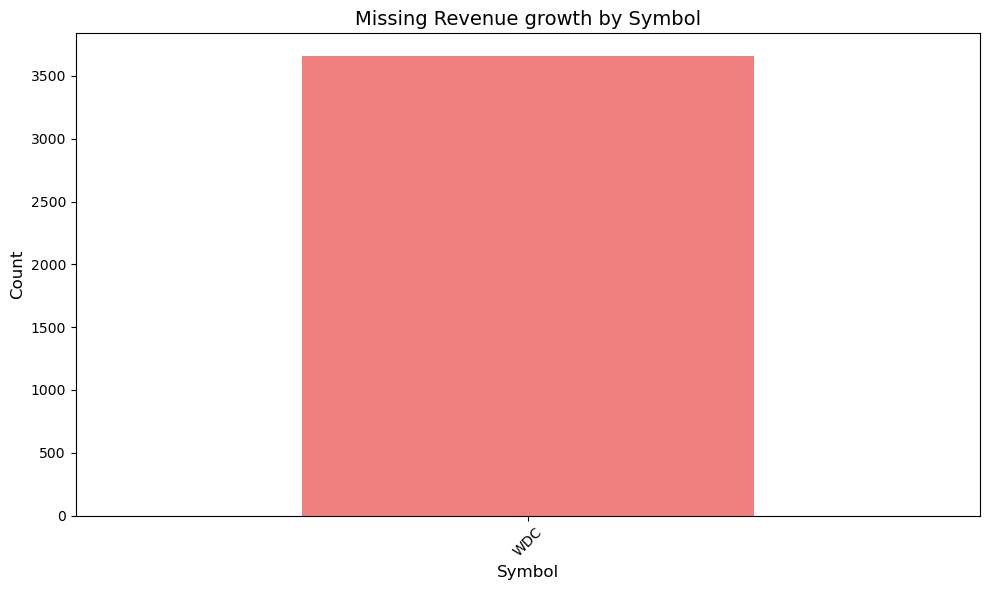

In [464]:
missing_revenuegrowth = stocks[stocks['Revenuegrowth'].isnull()].groupby(stocks['Symbol']).size()

# Create a bar chart
plt.figure(figsize=(10, 6))
missing_revenuegrowth.plot(kind='bar', color=color)
plt.title('Missing Revenue growth by Symbol', fontsize=14)
plt.xlabel('Symbol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [465]:
stocks['Revenuegrowth'] = stocks.groupby('Sector')['Revenuegrowth'].transform(lambda x: x.fillna(x.mean()))

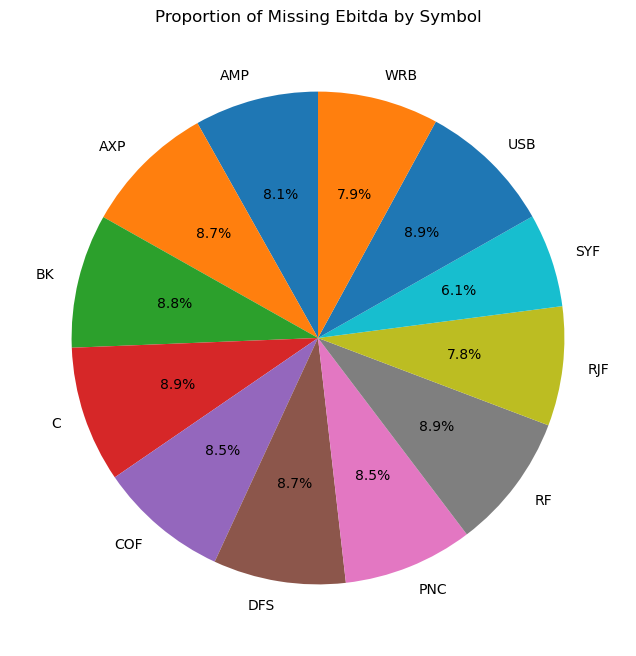

In [466]:
missing_ebitda = stocks[stocks['Ebitda'].isnull()].groupby(stocks['Symbol']).size()

missing_ebitda.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, legend=False)
plt.title('Proportion of Missing Ebitda by Symbol')
plt.ylabel('')
plt.show()


In [467]:
symbols_with_null_revenuegrowth = stocks[stocks['Revenuegrowth'].isnull()]['Symbol'].unique()
ebitda_df = stocks[['Symbol', 'Marketcap', 'Revenuegrowth', 'Weight','Ebitda']]
ebitda_df = ebitda_df[ebitda_df['Symbol'].isin(symbols_with_null_revenuegrowth) == False]
print(ebitda_df.shape)
ebitda_df.head()

(572653, 5)


,Symbol,Marketcap,Revenuegrowth,Weight,Ebitda
0,AOS,9964057600,-0.037,0.000179,809100032.0
1,AOS,9964057600,-0.037,0.000179,809100032.0
2,AOS,9964057600,-0.037,0.000179,809100032.0
3,AOS,9964057600,-0.037,0.000179,809100032.0
4,AOS,9964057600,-0.037,0.000179,809100032.0


In [468]:
ebitda_df.isnull().sum()

Symbol               0
Marketcap            0
Revenuegrowth        0
Weight               0
Ebitda           41966
dtype: int64

In [469]:
features = ['Marketcap', 'Revenuegrowth', 'Weight']
target = ['Ebitda']
# Prepare the DataFrame for regression
ebitda_df = stocks[['Marketcap', 'Revenuegrowth', 'Weight','Ebitda']]
# df[df['Ebitda'].notnull()]
train = ebitda_df[ebitda_df['Ebitda'].notnull()]
test = ebitda_df[ebitda_df['Ebitda'].isnull()]

model = LinearRegression()
model.fit(train[features], train[target])

# Predict Ebitda for stocks with missing values
stocks.loc[stocks['Ebitda'].isnull(), 'Ebitda'] = model.predict(test[features])


In [470]:
stocks

,Symbol,Sector,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight
0,AOS,Industrials,1104600.0,68.72,9964057600,8.091000e+08,-0.037,0.000179
1,AOS,Industrials,1207200.0,68.72,9964057600,8.091000e+08,-0.037,0.000179
2,AOS,Industrials,663000.0,68.72,9964057600,8.091000e+08,-0.037,0.000179
3,AOS,Industrials,564000.0,68.72,9964057600,8.091000e+08,-0.037,0.000179
4,AOS,Industrials,504600.0,68.72,9964057600,8.091000e+08,-0.037,0.000179
...,...,...,...,...,...,...,...,...
617826,XYL,Industrials,1515900.0,117.14,28458575872,1.689000e+09,0.013,0.000512
617827,XYL,Industrials,2009200.0,117.14,28458575872,1.689000e+09,0.013,0.000512
617828,XYL,Industrials,1638500.0,117.14,28458575872,1.689000e+09,0.013,0.000512
617829,XYL,Industrials,1708000.0,117.14,28458575872,1.689000e+09,0.013,0.000512


In [471]:
result = pd.concat([stocks.isnull().sum(),round(stocks.isnull().mean()*100,2)],axis=1)
result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
result.sort_values(by='total missing',ascending=False,inplace=True)
result

,total missing,proportion
Symbol,0,0.0
Sector,0,0.0
Volume,0,0.0
Currentprice,0,0.0
Marketcap,0,0.0
Ebitda,0,0.0
Revenuegrowth,0,0.0
Weight,0,0.0


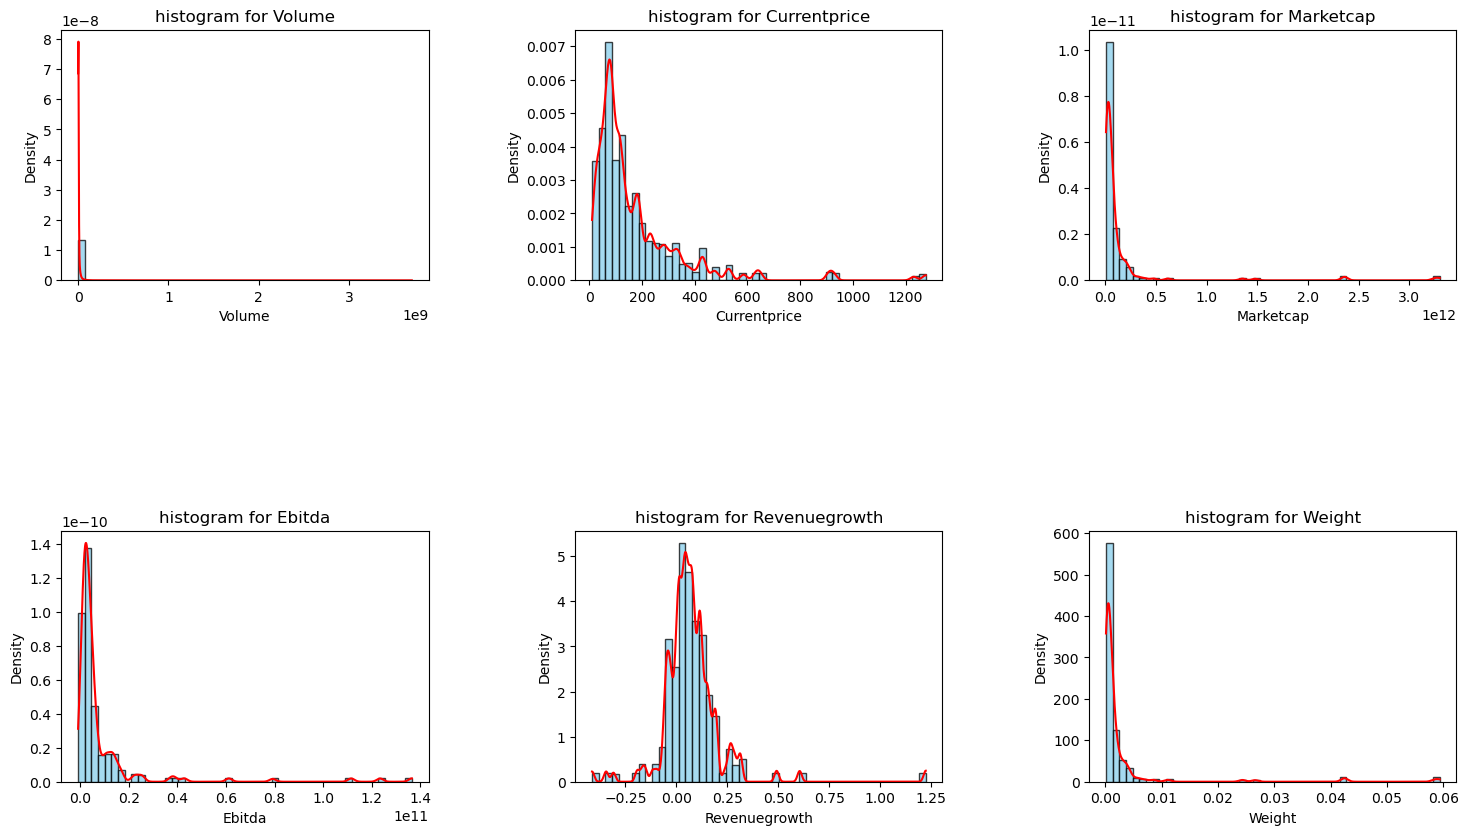

In [472]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=1, wspace=0.4)
ax = ax.flatten()
for i,col in enumerate(num_features):
    kde = stats.gaussian_kde(stocks[col])
    x = np.linspace(stocks[col].min(), stocks[col].max(), 1000)
    ax[i].plot(x, kde(x), color='red')
    ax[i].hist(stocks[col], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
    ax[i].set_title(f'histogram for {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Density')

In [473]:
stocks['Volume'] = np.log1p(stocks['Volume'])
stocks['Currentprice'] = np.log1p(stocks['Currentprice'])
stocks['Marketcap'] = np.log1p(stocks['Marketcap'])
stocks['Revenuegrowth'] = np.log1p(stocks['Revenuegrowth'])
stocks['Weight'] = np.log1p(stocks['Weight'])


In [474]:
stocks.head()

,Symbol,Sector,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight
0,AOS,Industrials,13.914995,4.244487,23.02225,809100032.0,-0.037702,0.000179
1,AOS,Industrials,14.003815,4.244487,23.02225,809100032.0,-0.037702,0.000179
2,AOS,Industrials,13.404532,4.244487,23.02225,809100032.0,-0.037702,0.000179
3,AOS,Industrials,13.242811,4.244487,23.02225,809100032.0,-0.037702,0.000179
4,AOS,Industrials,13.131523,4.244487,23.02225,809100032.0,-0.037702,0.000179


In [475]:
num_features = ['Volume', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Weight']


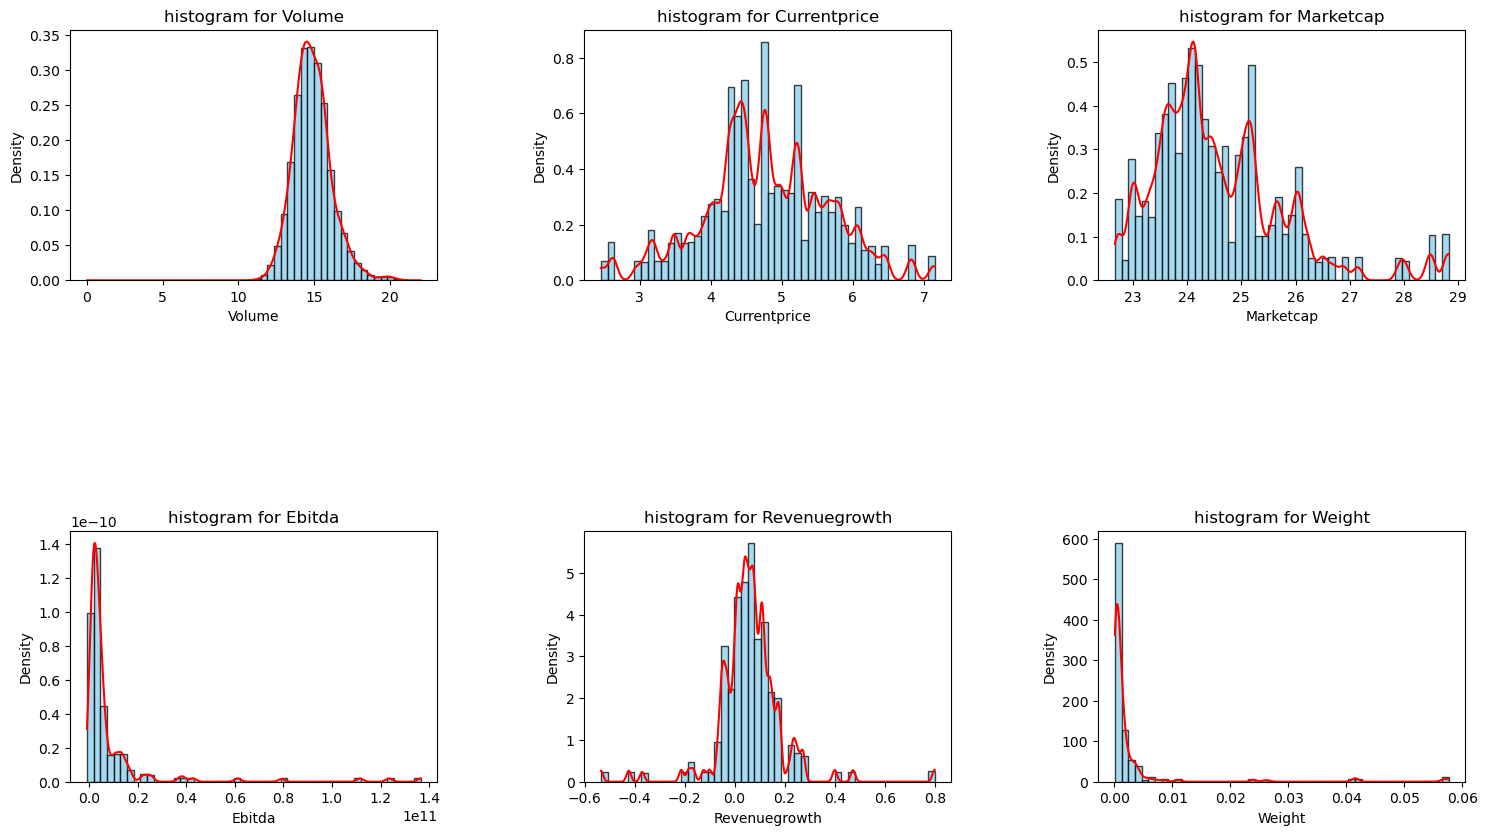

In [476]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=1, wspace=0.4)
ax = ax.flatten()
for i,col in enumerate(num_features):
    kde = stats.gaussian_kde(stocks[col])
    x = np.linspace(stocks[col].min(), stocks[col].max(), 1000)
    ax[i].plot(x, kde(x), color='red')
    ax[i].hist(stocks[col], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
    ax[i].set_title(f'histogram for {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Density')

In [477]:
stocks.head()

,Symbol,Sector,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight
0,AOS,Industrials,13.914995,4.244487,23.02225,809100032.0,-0.037702,0.000179
1,AOS,Industrials,14.003815,4.244487,23.02225,809100032.0,-0.037702,0.000179
2,AOS,Industrials,13.404532,4.244487,23.02225,809100032.0,-0.037702,0.000179
3,AOS,Industrials,13.242811,4.244487,23.02225,809100032.0,-0.037702,0.000179
4,AOS,Industrials,13.131523,4.244487,23.02225,809100032.0,-0.037702,0.000179


Text(0.5, 1.0, 'Correlation Heatmap')

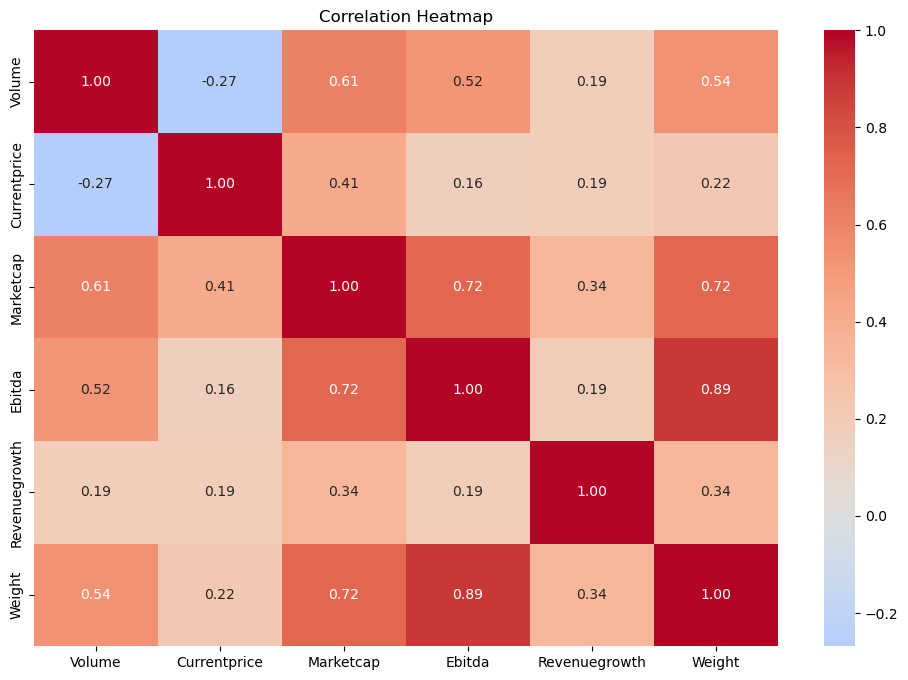

In [478]:
# correlations for selected features + TARGET
corr_matrix = stocks[num_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")

In [479]:
# Normalize the continuous variables
scaler = StandardScaler()
stocks[num_features] = scaler.fit_transform(stocks[num_features])
stocks


,Symbol,Sector,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight
0,AOS,Industrials,-0.755928,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567
1,AOS,Industrials,-0.686724,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567
2,AOS,Industrials,-1.153651,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567
3,AOS,Industrials,-1.279654,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567
4,AOS,Industrials,-1.366363,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567
...,...,...,...,...,...,...,...,...
617826,XYL,Industrials,-0.509309,0.000910,-0.419820,-0.362528,-0.367510,-0.272430
617827,XYL,Industrials,-0.289804,0.000910,-0.419820,-0.362528,-0.367510,-0.272430
617828,XYL,Industrials,-0.448714,0.000910,-0.419820,-0.362528,-0.367510,-0.272430
617829,XYL,Industrials,-0.416347,0.000910,-0.419820,-0.362528,-0.367510,-0.272430


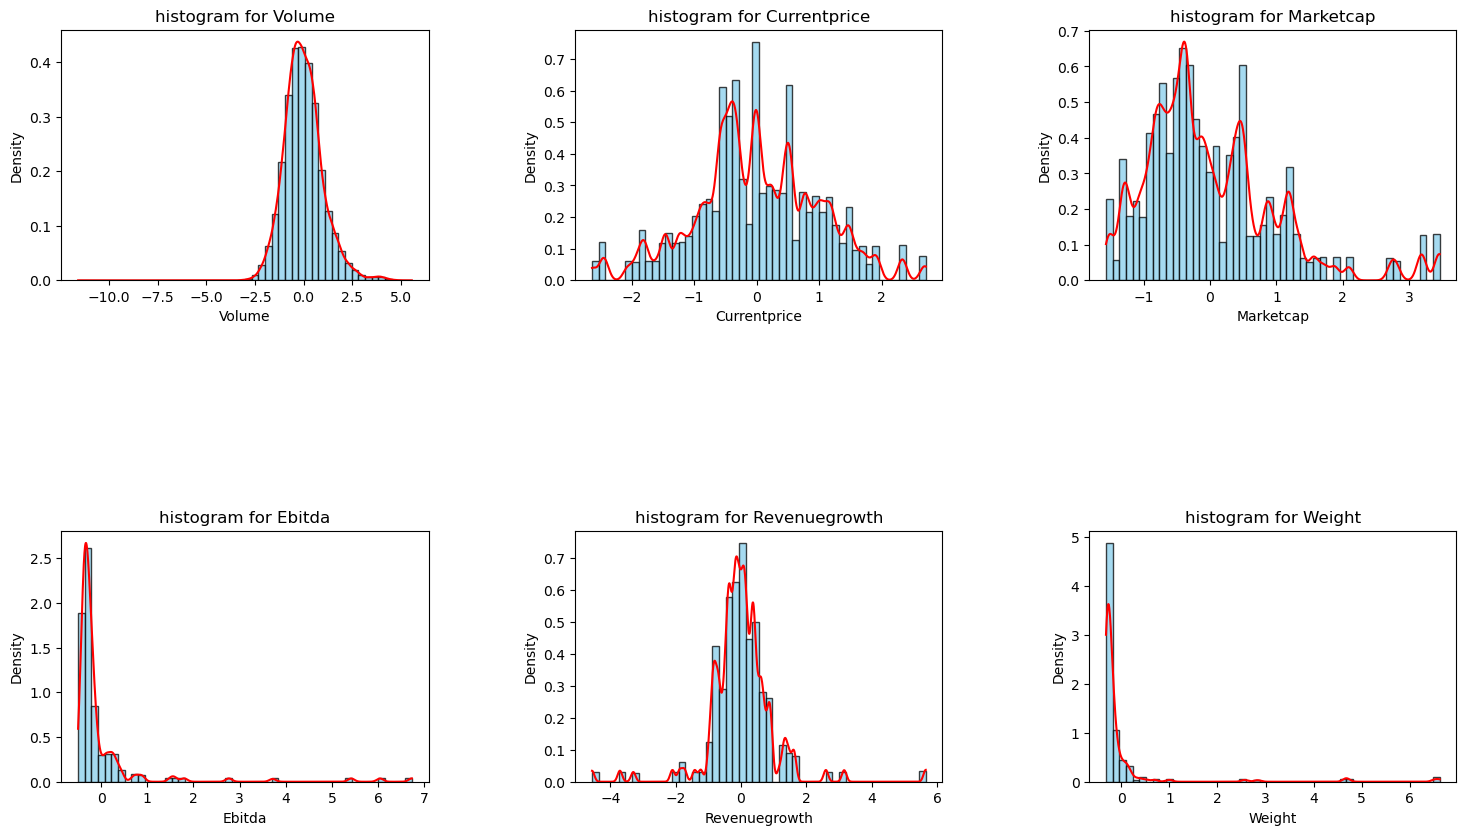

In [480]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=1, wspace=0.4)
ax = ax.flatten()
for i,col in enumerate(num_features):
    kde = stats.gaussian_kde(stocks[col])
    x = np.linspace(stocks[col].min(), stocks[col].max(), 1000)
    ax[i].plot(x, kde(x), color='red')
    ax[i].hist(stocks[col], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
    ax[i].set_title(f'histogram for {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Density')

In [481]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    kmeans.fit(data)
    return kmeans, kmeans.labels_, kmeans.inertia_

TODO: train test split based on date wise

In [483]:
inertias = []
knn_labels = []
train_eval = stocks.copy()
#stocks_num = stocks[num_features].reset_index(drop=True)
# Perform KMeans clustering for different values of k
for n_clusters in range(2, 11):
    kmeans, labels, inertia = kmeans_clustering(stocks[num_features], n_clusters)
    inertias.append(inertia)
    knn_labels.append(labels)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(stocks[num_features], labels)
    print(f'Number of clusters: {n_clusters}, Inertia: {inertia}, Silhouette Score: {silhouette_avg}')
    
    # Add cluster labels to the DataFrame
    stocks[f'cluster_{n_clusters}'] = labels



Number of clusters: 2, Inertia: 2114940.5343431383, Silhouette Score: 0.733190958616028
Number of clusters: 3, Inertia: 1640519.5675526704, Silhouette Score: 0.25016112377425315
Number of clusters: 4, Inertia: 1297365.829211839, Silhouette Score: 0.26809470777458394
Number of clusters: 5, Inertia: 1178421.4944570365, Silhouette Score: 0.24127840914472456
Number of clusters: 6, Inertia: 1082792.0043941792, Silhouette Score: 0.22027990660152572
Number of clusters: 7, Inertia: 983770.9364494975, Silhouette Score: 0.23036681130998365
Number of clusters: 8, Inertia: 821932.8663040283, Silhouette Score: 0.26570583932433167
Number of clusters: 9, Inertia: 750524.163505777, Silhouette Score: 0.26029712685990275
Number of clusters: 10, Inertia: 700926.8237871032, Silhouette Score: 0.2634549463215838


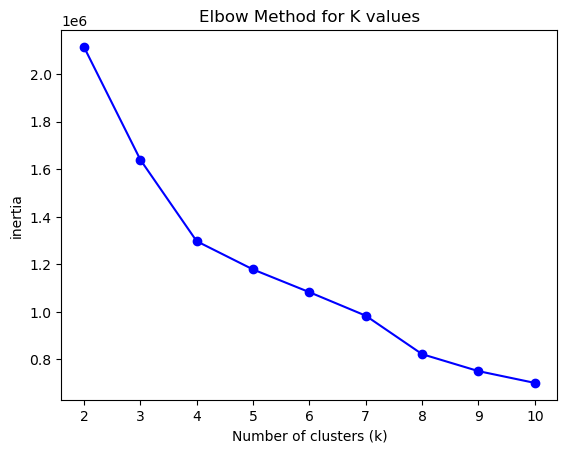

In [484]:
# Plot the elbow curve
plt.plot(range(2, 11), inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method for K values')
plt.show()

In [485]:
#stocks = pd.read_csv('stocks.csv')
#stocks_num = pd.read_csv('stocks_num.csv')


In [493]:
stocks.head()

,Symbol,Sector,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,PCA1,PCA2
0,AOS,Industrials,-0.755928,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.579497,-0.386433
1,AOS,Industrials,-0.686724,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.552879,-0.422750
2,AOS,Industrials,-1.153651,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.732479,-0.177715
3,AOS,Industrials,-1.279654,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.780945,-0.111591
4,AOS,Industrials,-1.366363,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.814297,-0.066088


In [488]:
cluster_summary = stocks.groupby('cluster_5')[num_features].mean().reset_index()
cluster_summary

,cluster_5,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight
0,0,-0.839184,0.800265,-0.216094,-0.293892,0.246862,-0.236715
1,1,2.418543,0.929028,3.231158,4.968700,1.658767,5.141899
2,2,-0.203478,-0.763385,-0.774088,-0.320109,-0.603444,-0.288763
3,3,0.692326,0.805965,1.370234,0.405158,-0.112219,0.354908
4,4,0.792233,-0.630090,0.230281,-0.040252,0.308337,-0.164543


In [496]:
stocks.head()

,Symbol,Sector,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,PCA1,PCA2
0,AOS,Industrials,-0.755928,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.579497,-0.386433
1,AOS,Industrials,-0.686724,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.552879,-0.422750
2,AOS,Industrials,-1.153651,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.732479,-0.177715
3,AOS,Industrials,-1.279654,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.780945,-0.111591
4,AOS,Industrials,-1.366363,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.814297,-0.066088


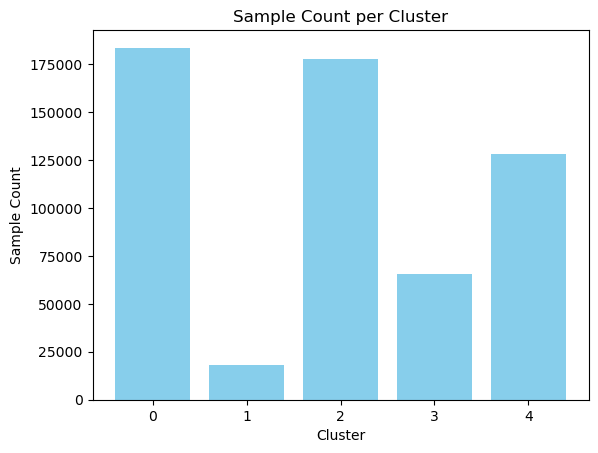

In [489]:
cluster_counts = stocks['cluster_5'].value_counts().sort_index()
cluster_summary['sample_count'] = cluster_counts
plt.bar(cluster_summary['cluster_5'], cluster_summary['sample_count'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Sample Count')
plt.title('Sample Count per Cluster')
plt.xticks(rotation=0)
plt.show()

In [494]:
cluster_summary

,cluster_5,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight,sample_count
0,0,-0.839184,0.800265,-0.216094,-0.293892,0.246862,-0.236715,183526
1,1,2.418543,0.929028,3.231158,4.968700,1.658767,5.141899,18012
2,2,-0.203478,-0.763385,-0.774088,-0.320109,-0.603444,-0.288763,177788
3,3,0.692326,0.805965,1.370234,0.405158,-0.112219,0.354908,65409
4,4,0.792233,-0.630090,0.230281,-0.040252,0.308337,-0.164543,127918


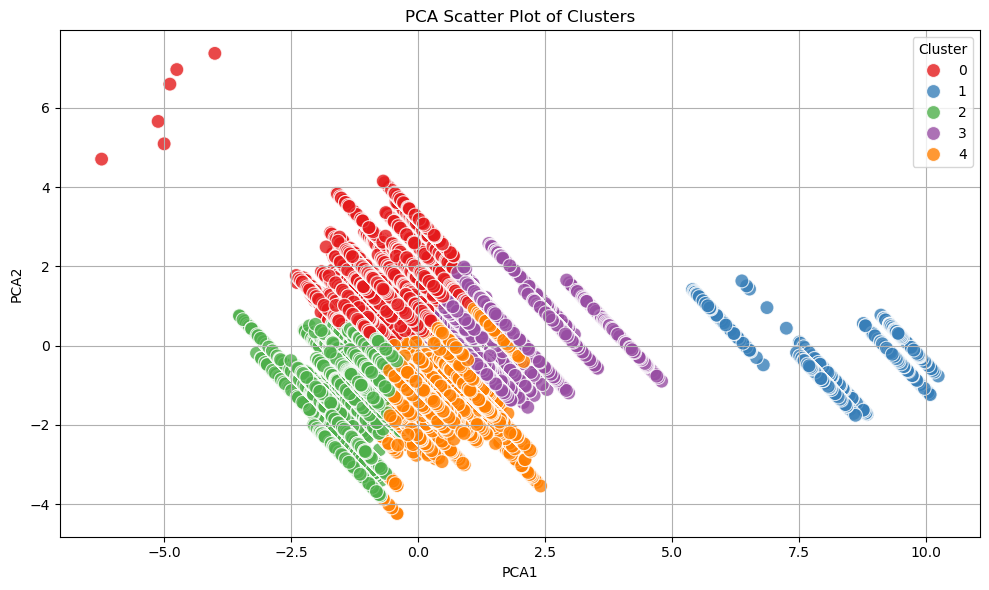

In [490]:
# --- 1. PCA Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stocks, x='PCA1', y='PCA2', hue='cluster_5', palette='Set1', s=100, alpha=0.8)
plt.title('PCA Scatter Plot of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

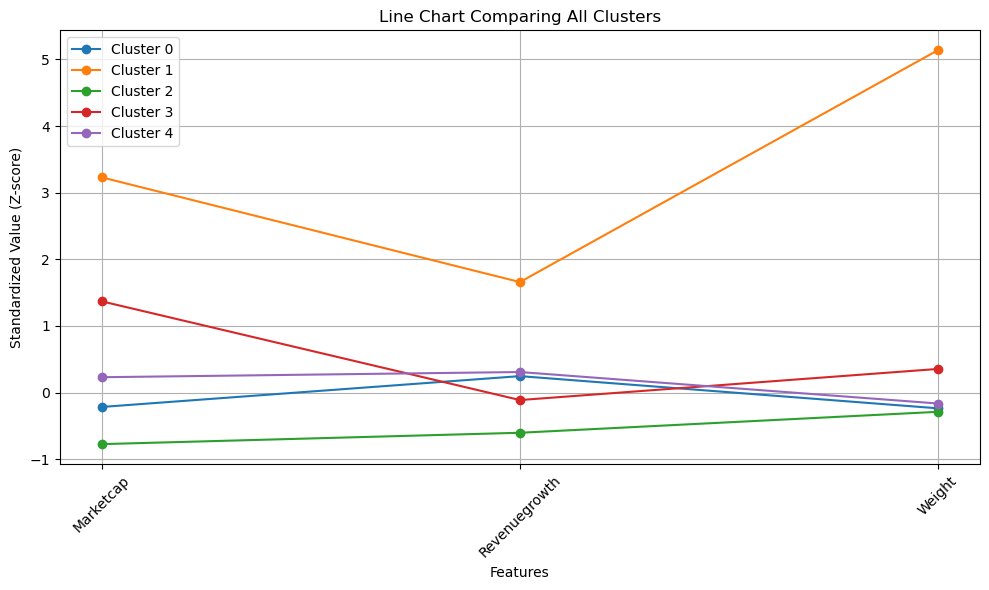

In [491]:
# --- 3. Line Chart of All Clusters ---
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(features, cluster_summary.loc[i, features], marker='o', label=f'Cluster {i}')
plt.title('Line Chart Comparing All Clusters')
plt.xlabel('Features')
plt.ylabel('Standardized Value (Z-score)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

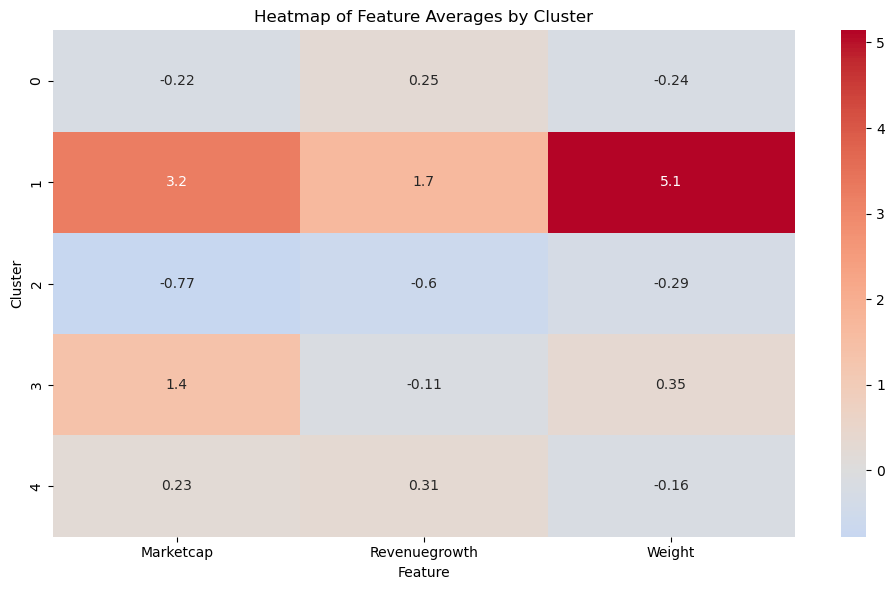

In [492]:
# --- 4. Heatmap of Cluster Features ---
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary[features], annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Averages by Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

In [499]:
stocks

,Symbol,Sector,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,Weight,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,PCA1,PCA2
0,AOS,Industrials,-0.755928,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.579497,-0.386433
1,AOS,Industrials,-0.686724,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.552879,-0.422750
2,AOS,Industrials,-1.153651,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.732479,-0.177715
3,AOS,Industrials,-1.279654,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.780945,-0.111591
4,AOS,Industrials,-1.366363,-0.598587,-1.276697,-0.408807,-0.755237,-0.312567,0,2,2,2,2,2,4,4,4,-1.814297,-0.066088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617826,XYL,Industrials,-0.509309,0.000910,-0.419820,-0.362528,-0.367510,-0.272430,0,2,2,2,2,2,4,4,4,-0.818554,0.157230
617827,XYL,Industrials,-0.289804,0.000910,-0.419820,-0.362528,-0.367510,-0.272430,0,2,2,2,2,2,4,4,4,-0.734123,0.042037
617828,XYL,Industrials,-0.448714,0.000910,-0.419820,-0.362528,-0.367510,-0.272430,0,2,2,2,2,2,4,4,4,-0.795247,0.125430
617829,XYL,Industrials,-0.416347,0.000910,-0.419820,-0.362528,-0.367510,-0.272430,0,2,2,2,2,2,4,4,4,-0.782797,0.108445
